In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:


os.makedirs('output', exist_ok=True)

#  Helper function to display images inline

In [4]:
def show_image(title, image, cmap_type='gray'):
    plt.figure(figsize=(6,6))
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

#  Load Image (Change file name if needed)
# Load as grayscale and color for different tasks

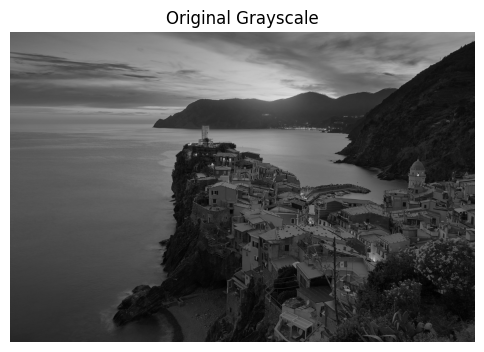

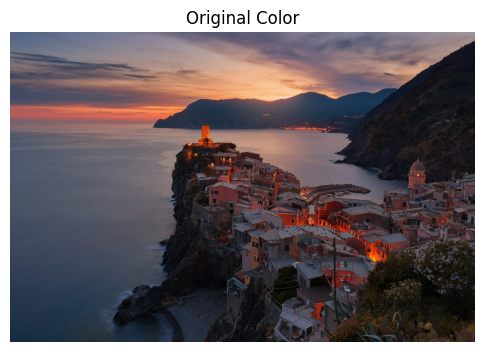

In [5]:
gray_img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
color_img = cv2.imread('image.jpg')
show_image('Original Grayscale', gray_img)
show_image('Original Color', cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB), cmap_type=None)

# ===========================================
# 1 Reduce Intensity Levels
# ===========================================

Reducing intensity levels...


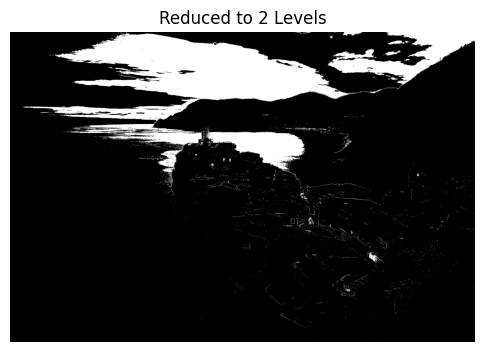

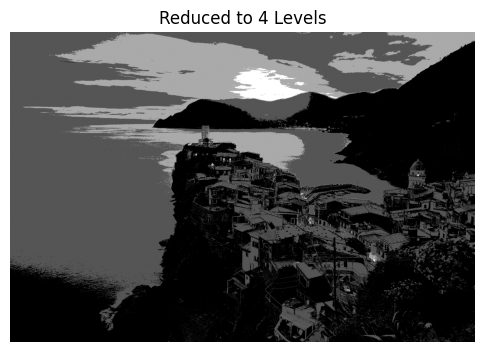

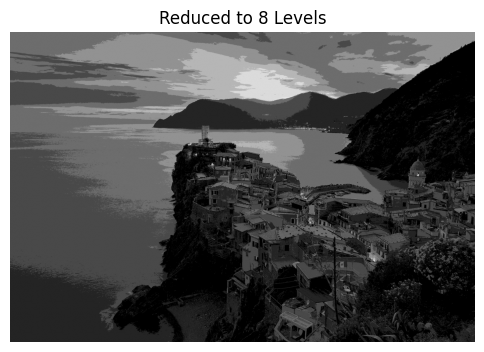

In [6]:
def reduce_intensity(image, levels):
    factor = 256 // levels
    reduced_image = (image // factor) * factor
    return reduced_image

print("Reducing intensity levels...")
for levels in [2, 4, 8]:
    reduced = reduce_intensity(gray_img, levels)
    show_image(f'Reduced to {levels} Levels', reduced)
    cv2.imwrite(f'output/reduced_{levels}.jpg', reduced)

# ===========================================
# 2️ Average Filtering
# ===========================================

Applying average filters...


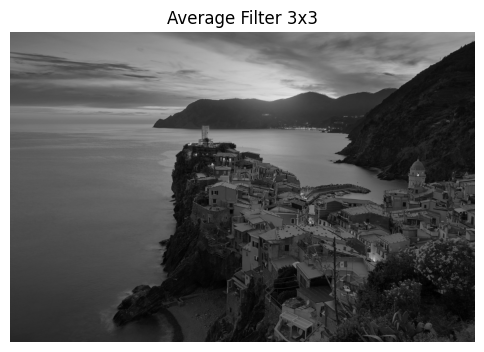

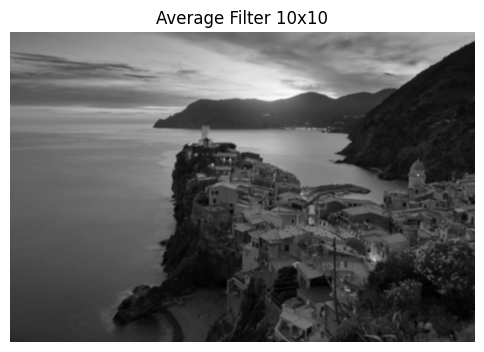

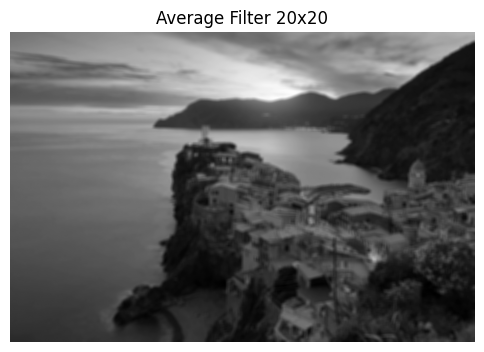

In [7]:
def average_filter(image, ksize):
    return cv2.blur(image, (ksize, ksize))

print("Applying average filters...")

for size in [3, 10, 20]:
    filtered = average_filter(gray_img, size)
    show_image(f'Average Filter {size}x{size}', filtered)
    cv2.imwrite(f'output/average_{size}x{size}.jpg', filtered)


# ===========================================
# 3️ Rotate Image by 45° and 90°
# ===========================================

Rotating image...


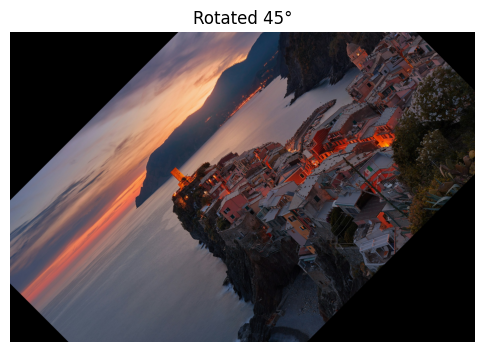

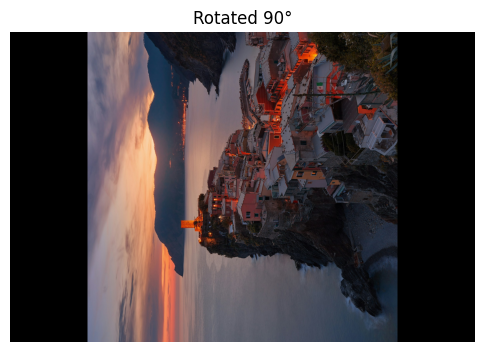

True

In [8]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w//2, h//2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

print("Rotating image...")
rotated_45 = rotate_image(color_img, 45)
rotated_90 = rotate_image(color_img, 90)

show_image('Rotated 45°', cv2.cvtColor(rotated_45, cv2.COLOR_BGR2RGB), cmap_type=None)
show_image('Rotated 90°', cv2.cvtColor(rotated_90, cv2.COLOR_BGR2RGB), cmap_type=None)

cv2.imwrite('output/rotated_45.jpg', rotated_45)
cv2.imwrite('output/rotated_90.jpg', rotated_90)

# ===========================================
# 4️ Block Averaging for Spatial Resolution Reduction
# ===========================================

Applying block averaging...


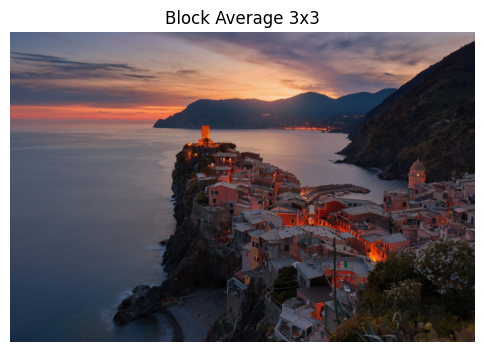

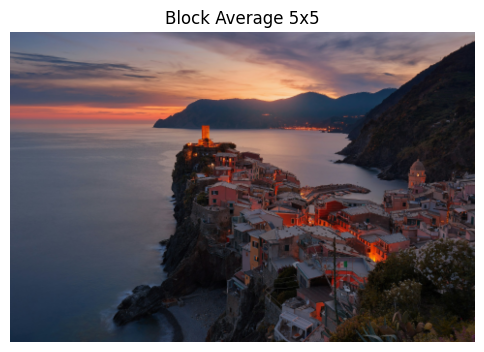

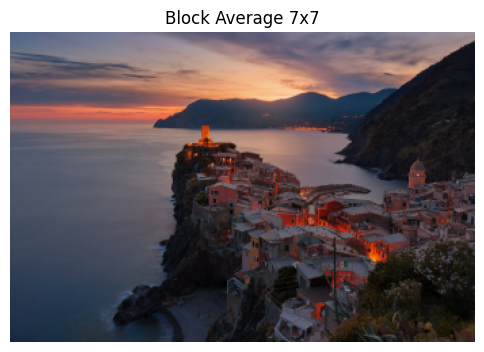

✅ All tasks completed! All images are displayed above and saved in 'output/' folder.


In [9]:
def block_average(image, block_size):
    """
    Reduce image resolution by block averaging.
    Works for both grayscale and color images.
    """
    output = image.copy()
    h, w = image.shape[:2]

    for y in range(0, h, block_size):
        for x in range(0, w, block_size):
            y_end = min(y + block_size, h)
            x_end = min(x + block_size, w)
            block = image[y:y_end, x:x_end]

            # For color or grayscale: average over all axes except the first two
            avg_color = block.mean(axis=(0, 1)).astype(np.uint8)

            output[y:y_end, x:x_end] = avg_color

    return output

print("Applying block averaging...")

for size in [3, 5, 7]:
    block_avg = block_average(color_img, size)

    # Display: convert BGR to RGB for Matplotlib
    show_image(f'Block Average {size}x{size}', cv2.cvtColor(block_avg, cv2.COLOR_BGR2RGB), cmap_type=None)

    # Save: keep BGR for saving
    cv2.imwrite(f'output/block_{size}x{size}.jpg', block_avg)

print("✅ All tasks completed! All images are displayed above and saved in 'output/' folder.")